In [41]:
import pandas as pd
asmlist = pd.read_csv("ShewanellaASMs.csv")
asmlist.describe()

,asm,species
count,35,35
unique,35,35
top,GCF_000013765.1,S.denitrificans OS217
freq,1,1


In [48]:
import os
import pandas as pd
df5 = pd.DataFrame()
directory = 'MumsFiles'

files = [f for f in os.listdir('MumsFiles/') if os.path.isfile(directory+'/'+f)]
for x in files:
  #print(x)
  df = pd.read_csv(f'MumsFiles/{x}', names=["MumsData"], sep="\t")
  df2 = df.drop(df[df["MumsData"].str.contains(r'[>]')].index)
  df3 = df2["MumsData"].str.split()
  df4 = pd.DataFrame(df3.to_list(), columns=["querystart", "refstart", "hitlen"])
  df4['hitlen'] = pd.to_numeric(df4['hitlen'], errors='coerce', downcast='integer')
  df4['querystart'] = pd.to_numeric(df4['querystart'], errors='coerce', downcast='integer')
  df4['refstart'] = pd.to_numeric(df4['refstart'], errors='coerce', downcast='integer')
  df4["species"] = x
  df5 = df5.append(df4)  ## - Make this using pandas.concat()


df5.reset_index(drop = True)

<ipython-input-48-c7acd7e08255>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(df4)  ## - Make this using pandas.concat()
<ipython-input-48-c7acd7e08255>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(df4)  ## - Make this using pandas.concat()
<ipython-input-48-c7acd7e08255>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(df4)  ## - Make this using pandas.concat()
<ipython-input-48-c7acd7e08255>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(df4)  ## - Make this using pandas.concat()
<ipython-input-48-c7acd7e08255>:17: FutureWarning: The frame.append method i

,querystart,refstart,hitlen,species
0,6873,1,33,GCF_017354965.1.mums
1,6918,46,47,GCF_017354965.1.mums
2,7803,928,26,GCF_017354965.1.mums
3,8333,1461,30,GCF_017354965.1.mums
4,10145,3158,29,GCF_017354965.1.mums
...,...,...,...,...
83880,3739727,38778,109,GCF_025402875.1.mums
83881,4382402,38549,29,GCF_025402875.1.mums
83882,3740041,38468,29,GCF_025402875.1.mums
83883,4684698,38316,43,GCF_025402875.1.mums


In [61]:
## Remove the large outlier
#df.drop(df[(df['Unit_Price'] >400) & (df['Unit_Price'] < 600)].index, inplace=True)
df5.drop(df5[(df5['hitlen'] > 100)].index, inplace=True)
df5.describe()

,querystart,refstart,hitlen
count,5.216400e+04,5.216400e+04,52164.000000
mean,2.421836e+06,2.491307e+06,38.174181
std,1.457459e+06,1.445367e+06,15.117282
min,1.000000e+00,1.000000e+00,25.000000
25%,1.171272e+06,1.247677e+06,28.000000
50%,2.411608e+06,2.498151e+06,32.000000
75%,3.664766e+06,3.727401e+06,43.000000
max,4.969770e+06,6.446759e+06,100.000000


In [62]:
df5[["hitlen"]].describe()


,hitlen
count,52164.000000
mean,38.174181
std,15.117282
min,25.000000
25%,28.000000
50%,32.000000
75%,43.000000
max,100.000000


<Axes: title={'center': 'hitlen'}, xlabel='species'>

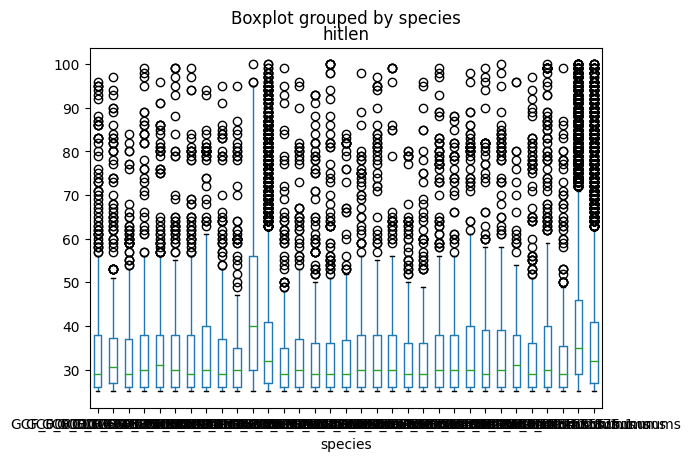

In [66]:
## Here is a try, without using seaborn.  There is a strange outlier.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df5.boxplot(by ='species', column =['hitlen'], grid = False)
#ax = sns.boxplot(x="species", y="hitlen", hue="species", data=df5, palette="Set3")

#sns.boxplot(data=df5)


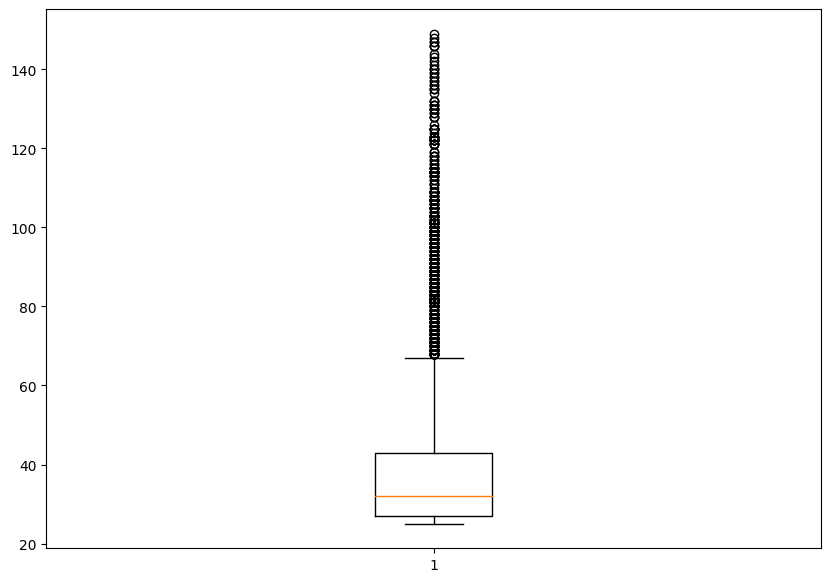

In [ ]:
# Import libraries
# https://www.geeksforgeeks.org/sort-boxplot-by-mean-with-seaborn-in-python/
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(df5['hitlen'])

# show plot
plt.show()

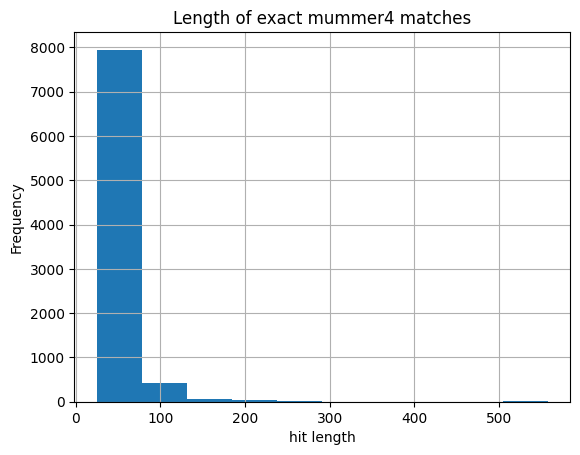

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of a single column in the DataFrame
df4.hist(column='hitlen')

# Set the title and axis labels
plt.title('Length of exact mummer4 matches')
plt.xlabel('hit length')
plt.ylabel('Frequency')

# Display the histogram
plt.show()



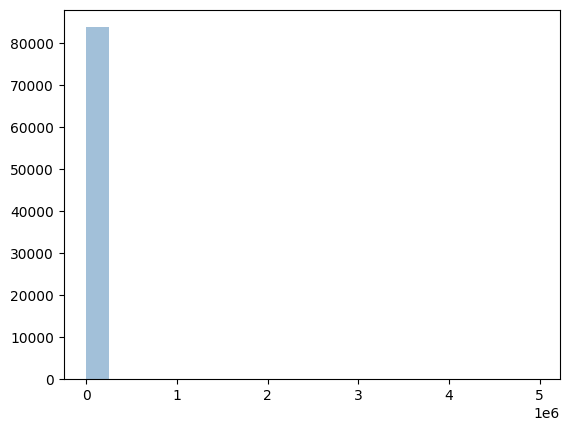

In [51]:
#df5 = df4[df4['hitlen'] < 150]

plt.hist(df5['hitlen'], bins=20, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

<ipython-input-50-d5fd48f6d85e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['hitlen'], hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='hitlen', ylabel='Density'>

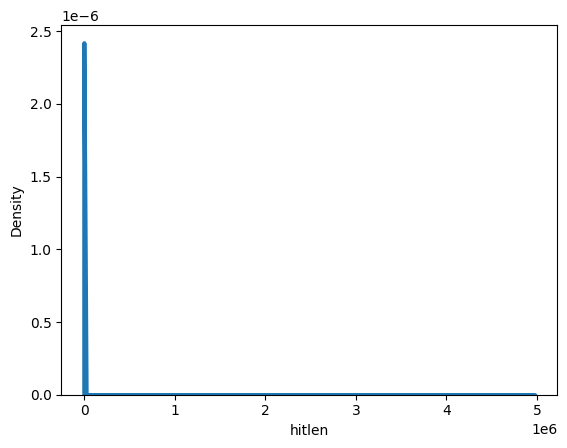

In [50]:
## This histogram will now show the dataframe with every single hit from the 32 assemblies:

sns.distplot(df5['hitlen'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                  label = 'hit length')